<a href="https://colab.research.google.com/github/Jassmine11/cfpb-complaints-project/blob/main/CFPB_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
!pip install gdown


In [6]:
import gdown

url = "https://drive.google.com/uc?id=1UCLpDLu_kzoSKGWer8Hp8DXGE0yy3XWu"
output = "consumer_complaints.csv"

gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1UCLpDLu_kzoSKGWer8Hp8DXGE0yy3XWu
From (redirected): https://drive.google.com/uc?id=1UCLpDLu_kzoSKGWer8Hp8DXGE0yy3XWu&confirm=t&uuid=6fb398fe-2208-48fb-8176-c852372f5a95
To: /content/consumer_complaints.csv
100%|██████████| 1.41G/1.41G [00:19<00:00, 73.3MB/s]


'consumer_complaints.csv'

In [12]:
import gdown
import zipfile
import os
import pandas as pd

# Step 1: Download the ZIP file from Google Drive
url = "https://drive.google.com/uc?id=1UCLpDLu_kzoSKGWer8Hp8DXGE0yy3XWu"
output_zip = "consumer_complaints.zip"
gdown.download(url, output_zip, quiet=False)

# Step 2: Unzip the file
extract_folder = './consumer_complaints/'
os.makedirs(extract_folder, exist_ok=True)

with zipfile.ZipFile(output_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Step 3: Check extracted files
extracted_files = os.listdir(extract_folder)
print("Extracted files:", extracted_files)

# Step 4: Load the CSV (assuming single CSV in zip)
csv_file = os.path.join(extract_folder, extracted_files[0])

# Step 5: Read a sample from the CSV (to avoid memory issues)
df_sample = pd.read_csv(csv_file, nrows=1000)
print(df_sample.head())


Downloading...
From (original): https://drive.google.com/uc?id=1UCLpDLu_kzoSKGWer8Hp8DXGE0yy3XWu
From (redirected): https://drive.google.com/uc?id=1UCLpDLu_kzoSKGWer8Hp8DXGE0yy3XWu&confirm=t&uuid=063d6265-0b6b-402e-9c21-ff6577c9c0f9
To: /content/consumer_complaints.zip
100%|██████████| 1.41G/1.41G [00:14<00:00, 94.8MB/s]


Extracted files: ['complaints.csv']
  Date received                                            Product  \
0    2025-07-20                                    Debt collection   
1    2025-08-07  Credit reporting or other personal consumer re...   
2    2025-08-06  Credit reporting or other personal consumer re...   
3    2025-08-07  Credit reporting or other personal consumer re...   
4    2025-08-06  Credit reporting or other personal consumer re...   

        Sub-product                                 Issue  \
0       Rental debt             Electronic communications   
1  Credit reporting           Improper use of your report   
2  Credit reporting  Incorrect information on your report   
3  Credit reporting           Improper use of your report   
4  Credit reporting           Improper use of your report   

                                           Sub-issue  \
0  You told them to stop contacting you, but they...   
1      Reporting company used your report improperly   
2       

In [13]:
# check shape ( rows and columns)
# look at column names
# check data types and missing values

print("Shape:", df_sample.shape)
print("\nColumns:", df_sample.columns.tolist())
print("\nData types:\n", df_sample.dtypes)
print("\nMissing values per column:\n", df_sample.isnull().sum())


Shape: (1000, 18)

Columns: ['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']

Data types:
 Date received                    object
Product                          object
Sub-product                      object
Issue                            object
Sub-issue                        object
Consumer complaint narrative     object
Company public response          object
Company                          object
State                            object
ZIP code                         object
Tags                             object
Consumer consent provided?       object
Submitted via                    object
Date sent to company             object
Company response to consumer     object
Timely response?                

In [14]:
# statistics

print(df_sample.describe())


       Consumer disputed?  Complaint ID
count                 0.0  1.000000e+03
mean                  NaN  1.477946e+07
std                   NaN  1.673310e+06
min                   NaN  2.848041e+06
25%                   NaN  1.500474e+07
50%                   NaN  1.506373e+07
75%                   NaN  1.512695e+07
max                   NaN  1.519032e+07


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
import missingno as msno
import geopandas as gpd
import plotly.express as px
from scipy.stats import chi2_contingency

In [19]:
# Assuming your dataframe is df_sample
df = df_sample.copy()

/tmp/ipython-input-996048823.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette="Set2")


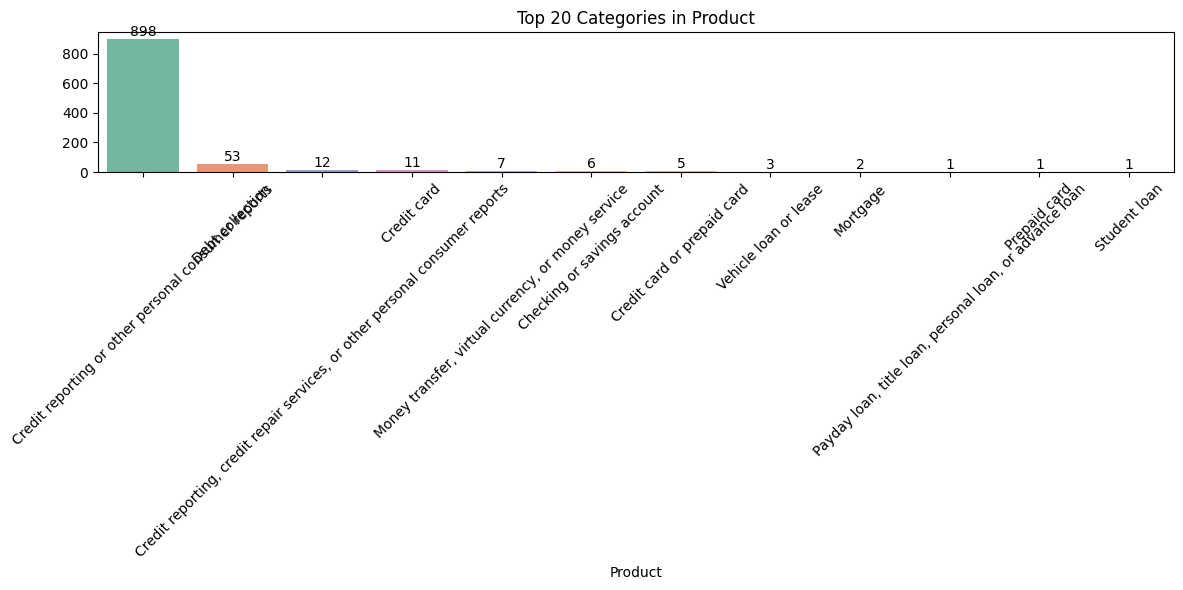

/tmp/ipython-input-996048823.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette="Set2")


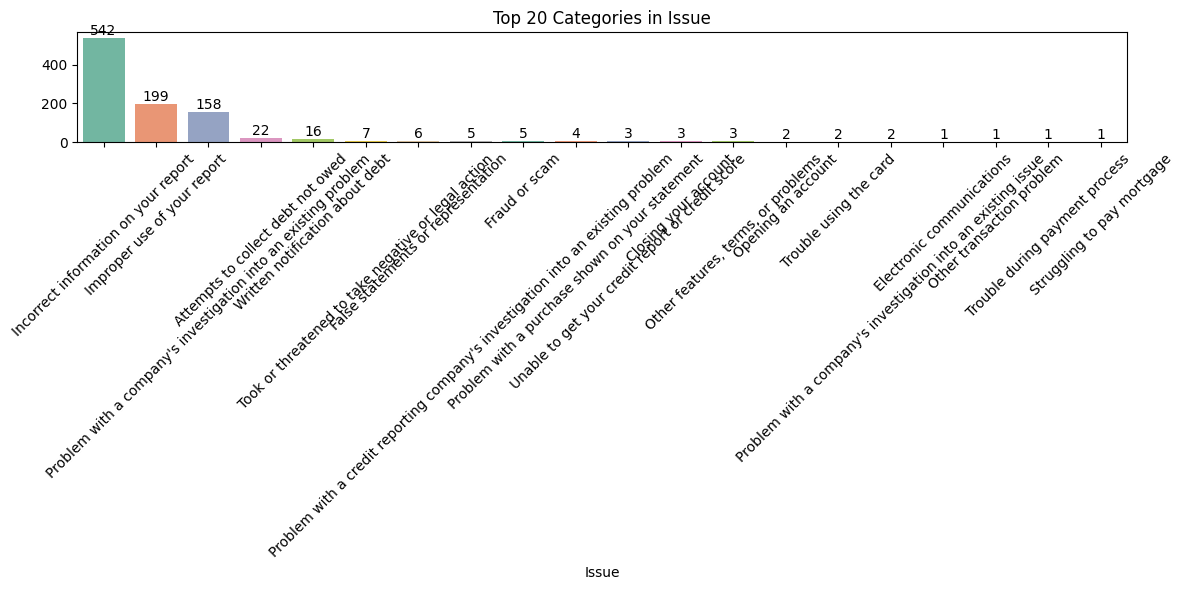

/tmp/ipython-input-996048823.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette="Set2")


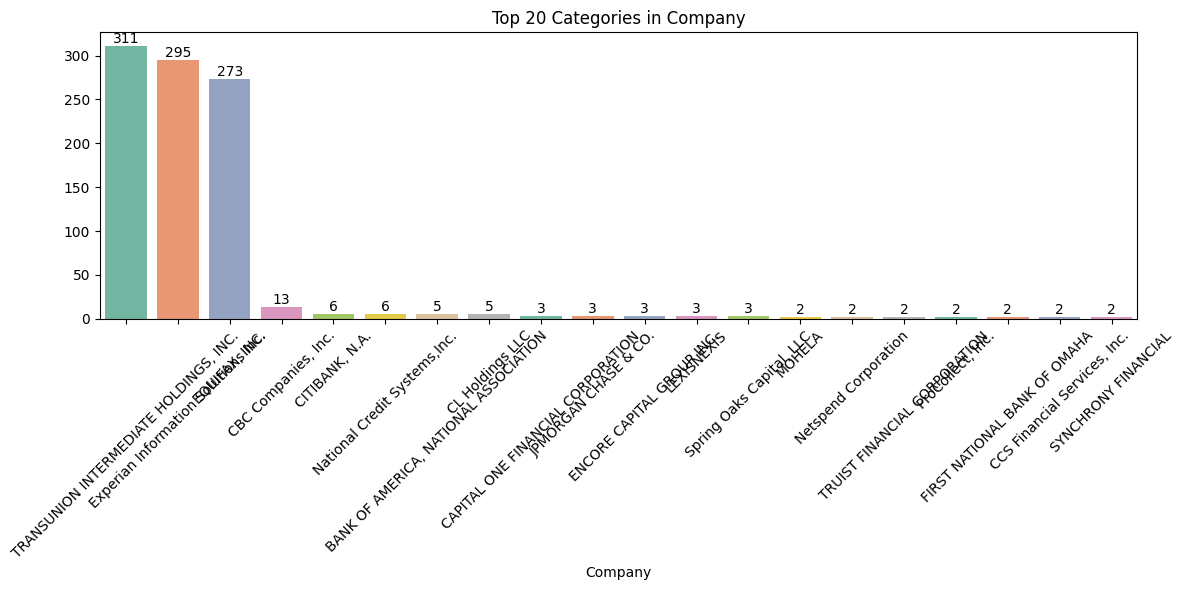

/tmp/ipython-input-996048823.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette="Set2")


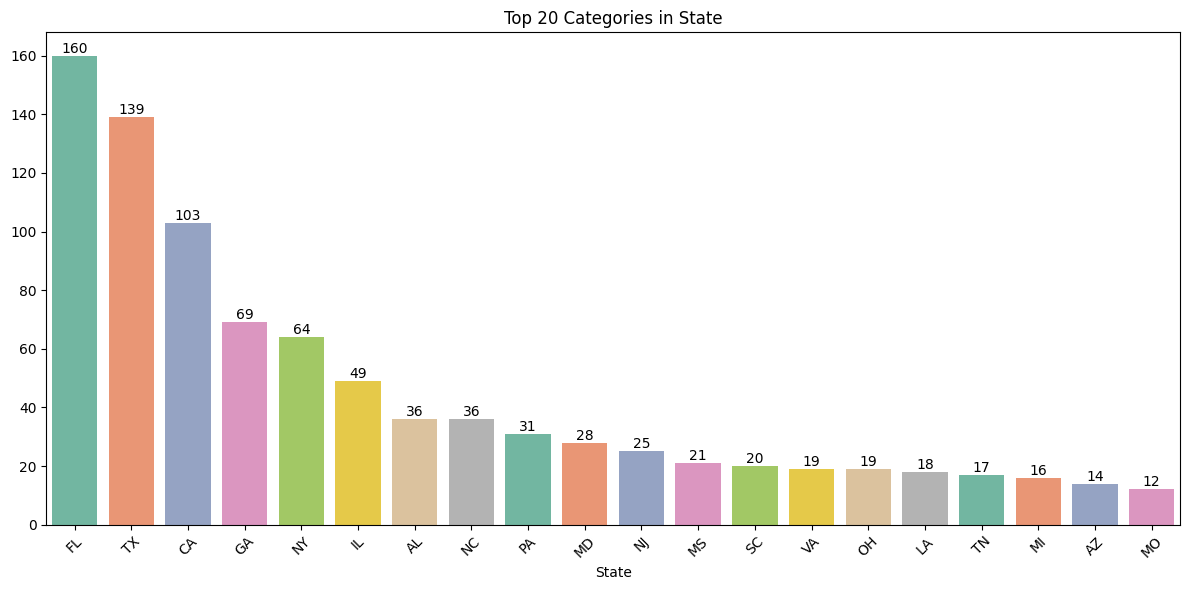

In [30]:
#Enhanced categorical plots with value labels
def plot_count_with_labels(df, col, top_n=20):
    plt.figure(figsize=(12,6))
    counts = df[col].value_counts().nlargest(top_n)
    ax = sns.barplot(x=counts.index, y=counts.values, palette="Set2")
    plt.title(f"Top {top_n} Categories in {col}")
    plt.xticks(rotation=45)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.show()

for col in ['Product', 'Issue', 'Company', 'State']:
    if col in df.columns:
        plot_count_with_labels(df, col)

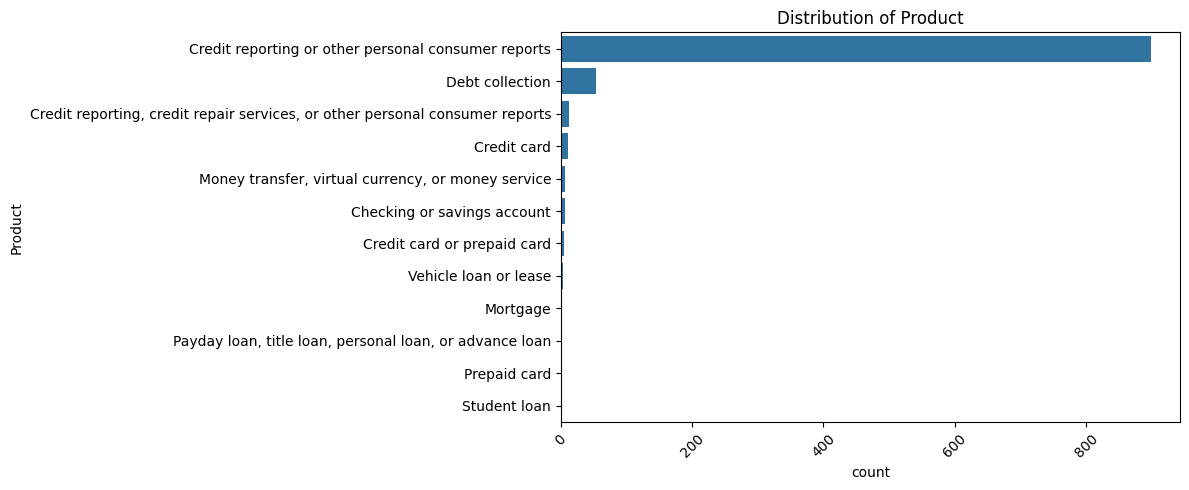

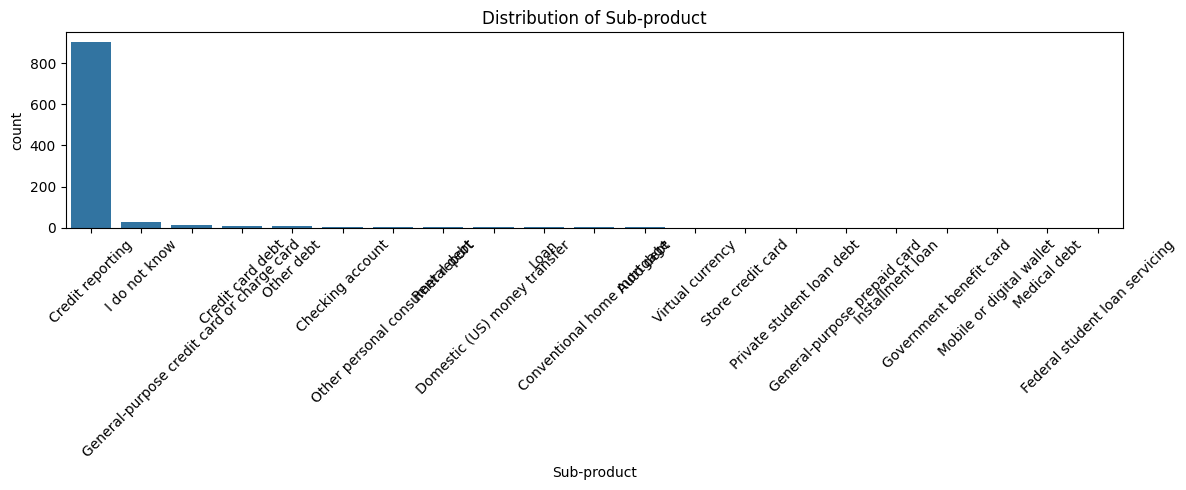

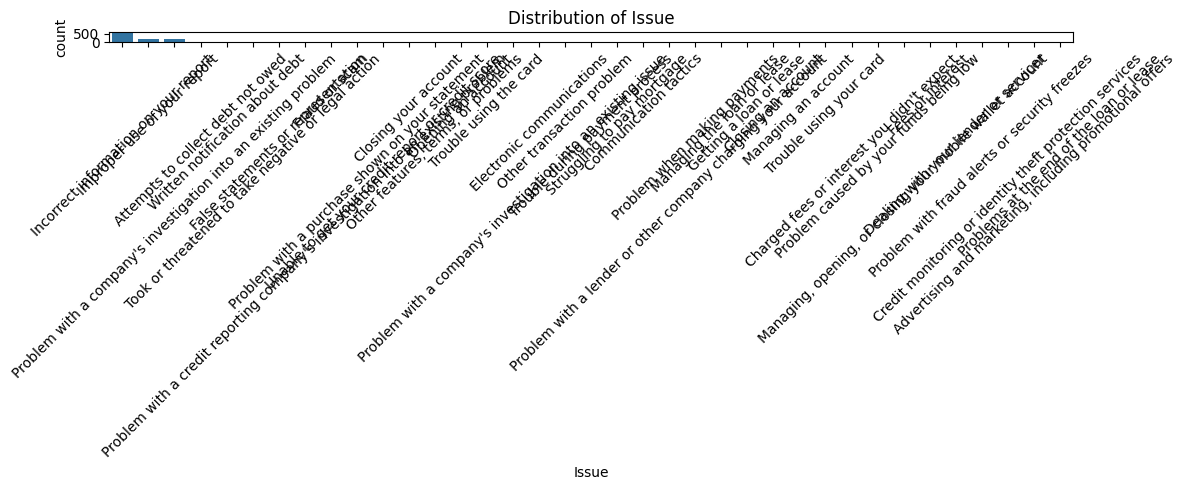

/tmp/ipython-input-268696545.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


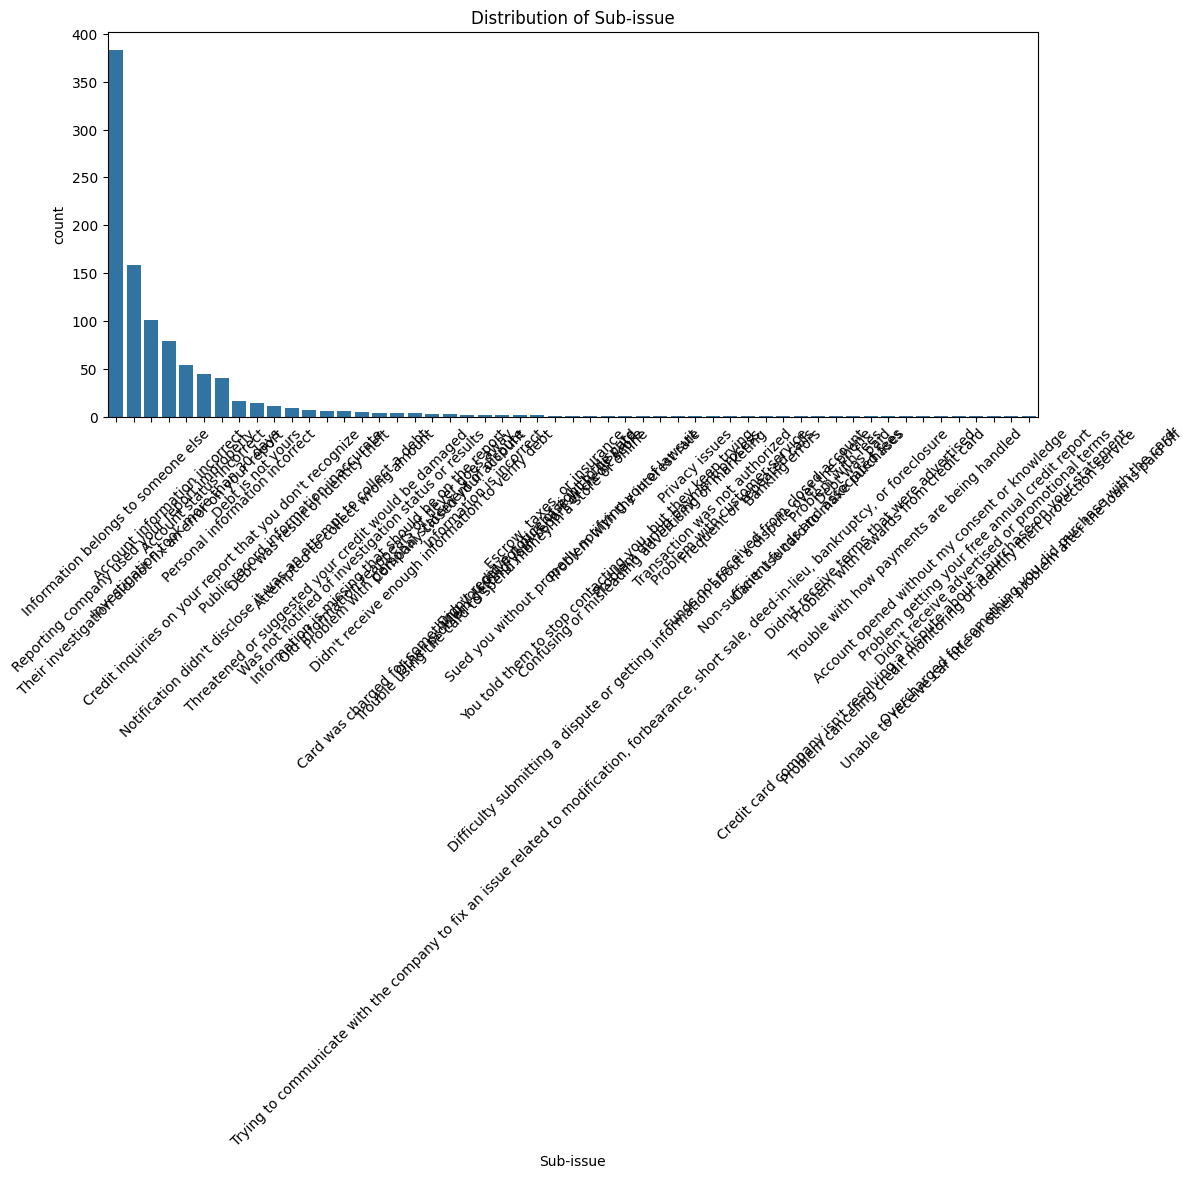

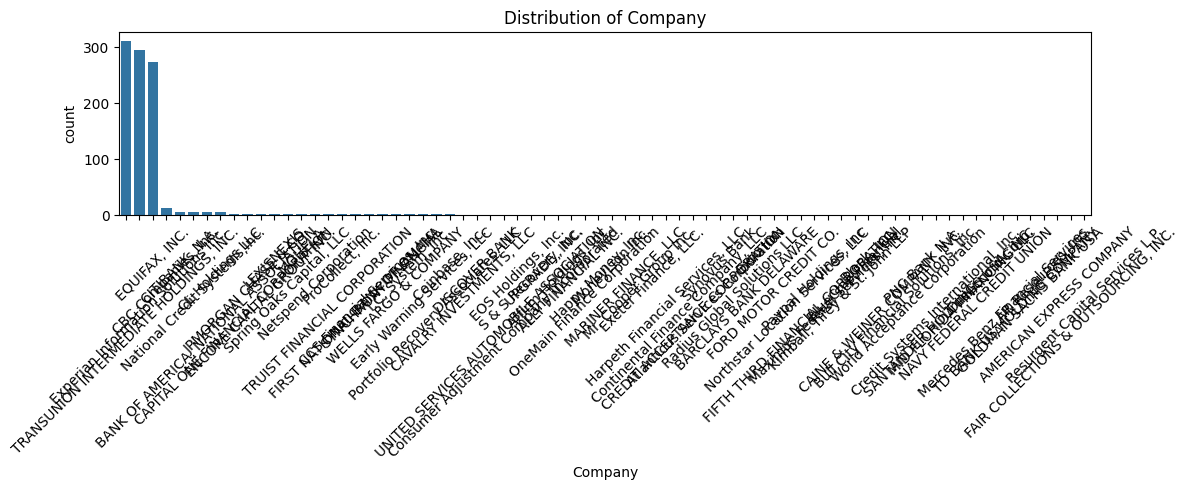

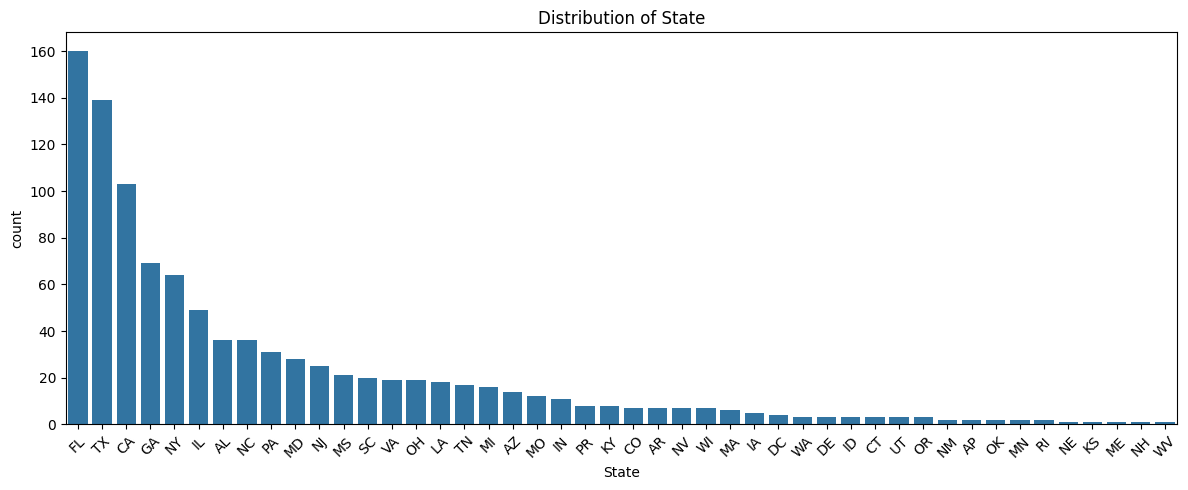

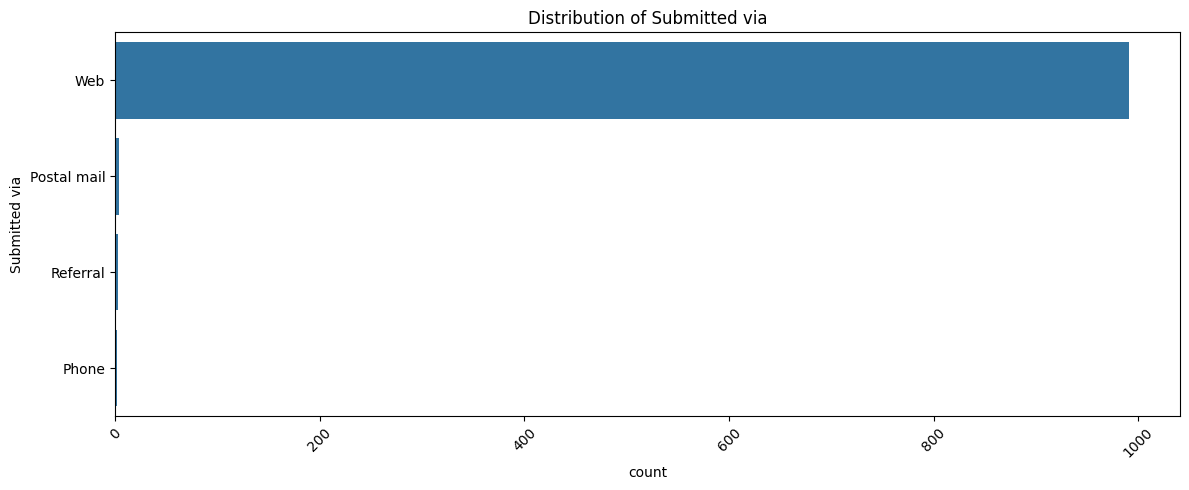

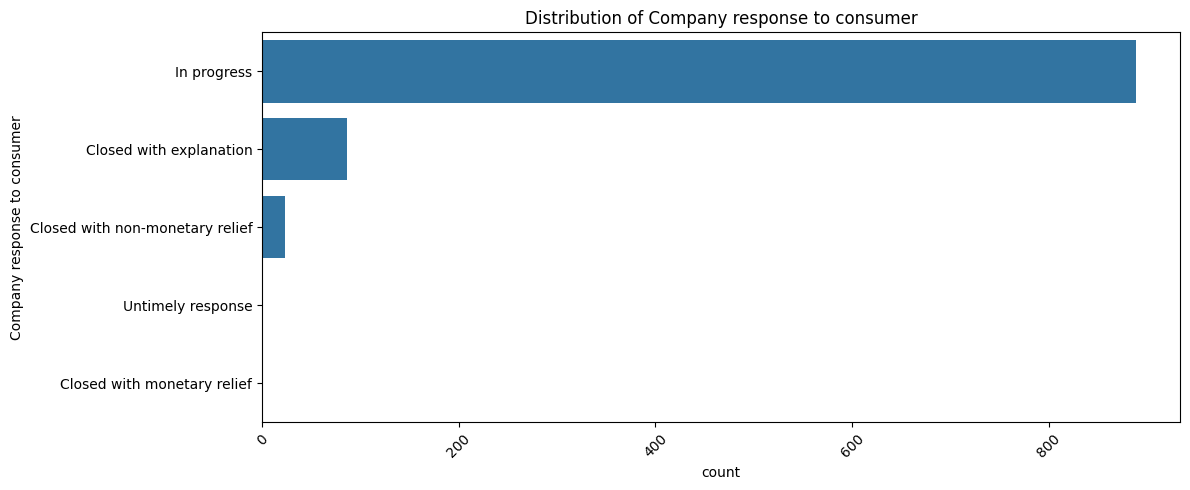

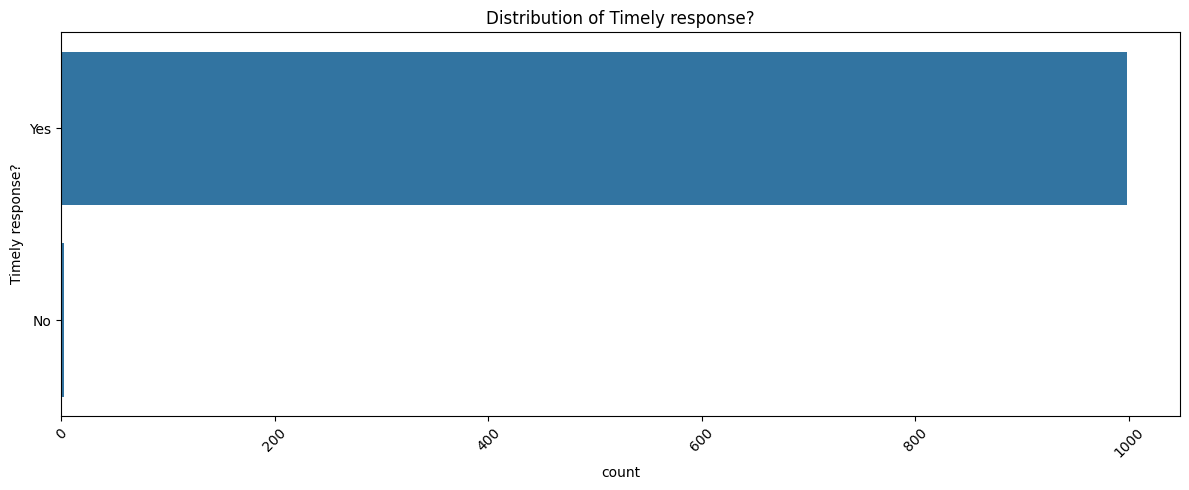

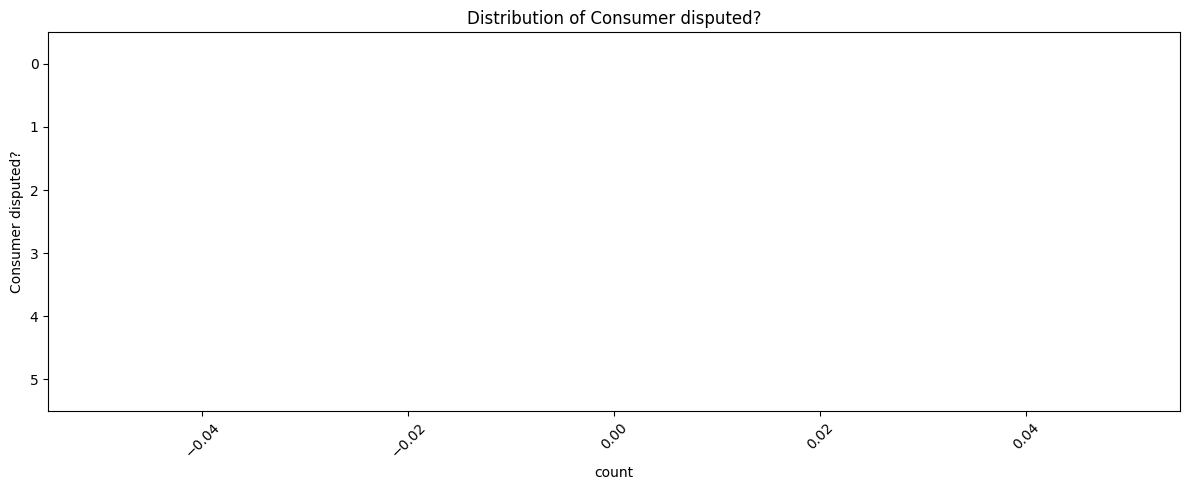

In [20]:
# Enhanced categorical plots with value labels

cat_vars = ['Product', 'Sub-product', 'Issue', 'Sub-issue', 'Company', 'State',
            'Submitted via', 'Company response to consumer', 'Timely response?', 'Consumer disputed?']
for col in cat_vars:
    if col in df.columns:
        plt.figure(figsize=(12,5))
        order = df[col].value_counts().index
        sns.countplot(data=df, y=col if df[col].nunique() < 20 else None, x=col if df[col].nunique() >= 20 else None, order=order)
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

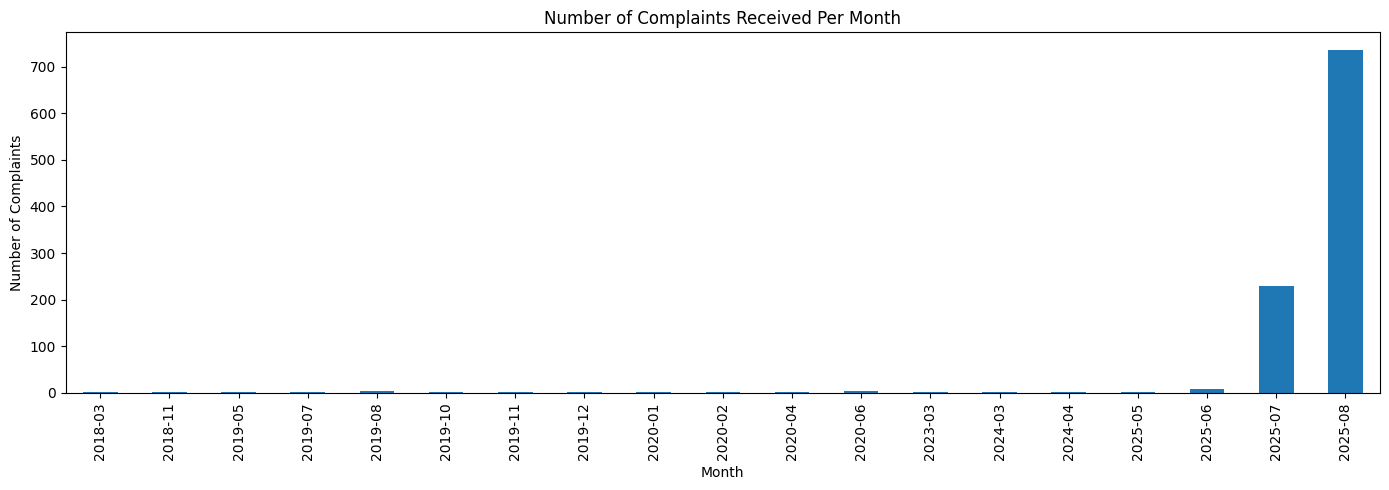

In [21]:
#Distribution of Date Variables

# Convert date columns to datetime
date_cols = ['Date received', 'Date sent to company']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Plot number of complaints over time
if 'Date received' in df.columns:
    plt.figure(figsize=(14,5))
    df['Date received'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
    plt.title('Number of Complaints Received Per Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Complaints')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

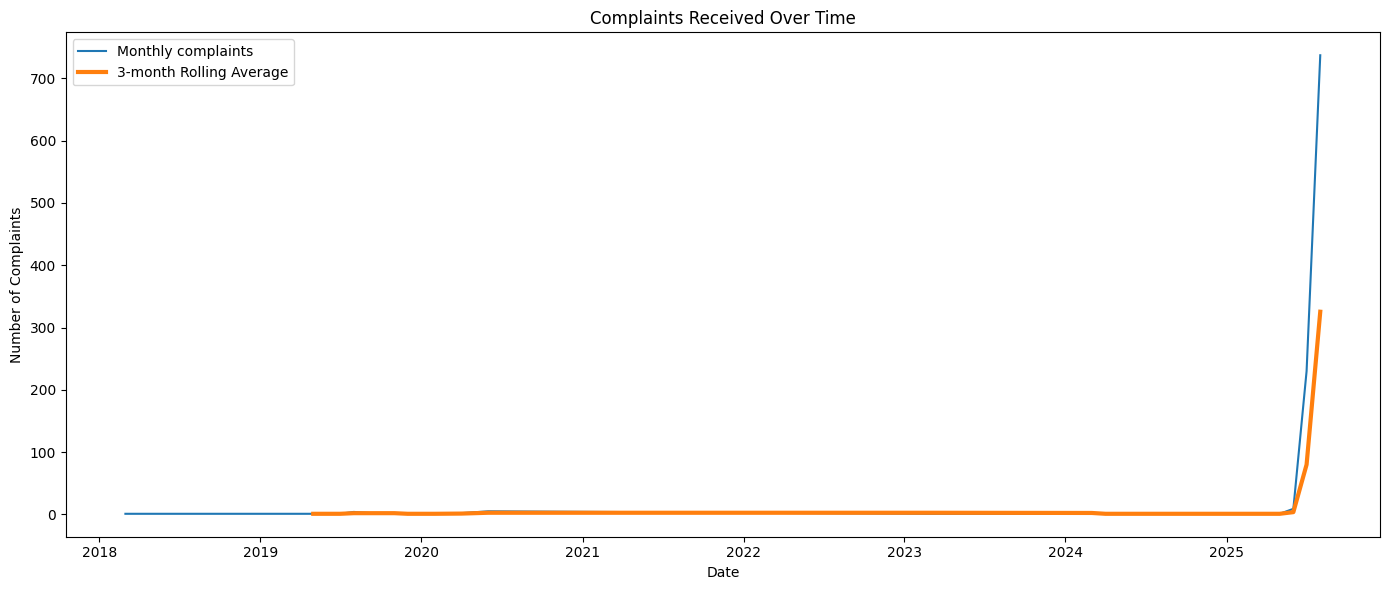

In [31]:
 #Time trend with rolling average of complaints received monthly
if 'Date received' in df.columns:
    df['Date received'] = pd.to_datetime(df['Date received'], errors='coerce')
    monthly_counts = df.groupby(df['Date received'].dt.to_period('M')).size().to_frame('counts')
    monthly_counts.index = monthly_counts.index.to_timestamp()

    plt.figure(figsize=(14,6))
    plt.plot(monthly_counts.index, monthly_counts['counts'], label='Monthly complaints')
    plt.plot(monthly_counts.index, monthly_counts['counts'].rolling(window=3).mean(), label='3-month Rolling Average', linewidth=3)
    plt.title('Complaints Received Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Complaints')
    plt.legend()
    plt.tight_layout()
    plt.show()

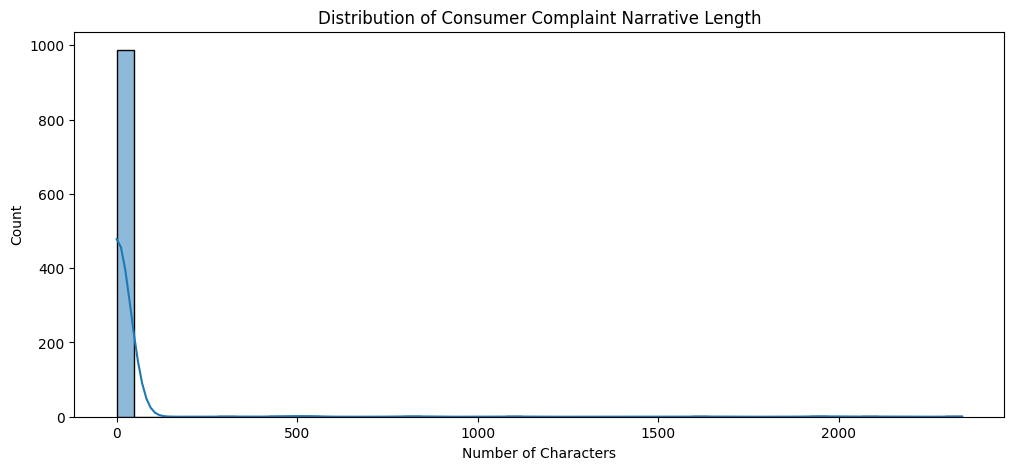

In [22]:
 #Text Length Analysis for Consumer complaint narrative

if 'Consumer complaint narrative' in df.columns:
    df['narrative_length'] = df['Consumer complaint narrative'].fillna('').apply(len)
    plt.figure(figsize=(12,5))
    sns.histplot(df['narrative_length'], bins=50, kde=True)
    plt.title('Distribution of Consumer Complaint Narrative Length')
    plt.xlabel('Number of Characters')
    plt.show()

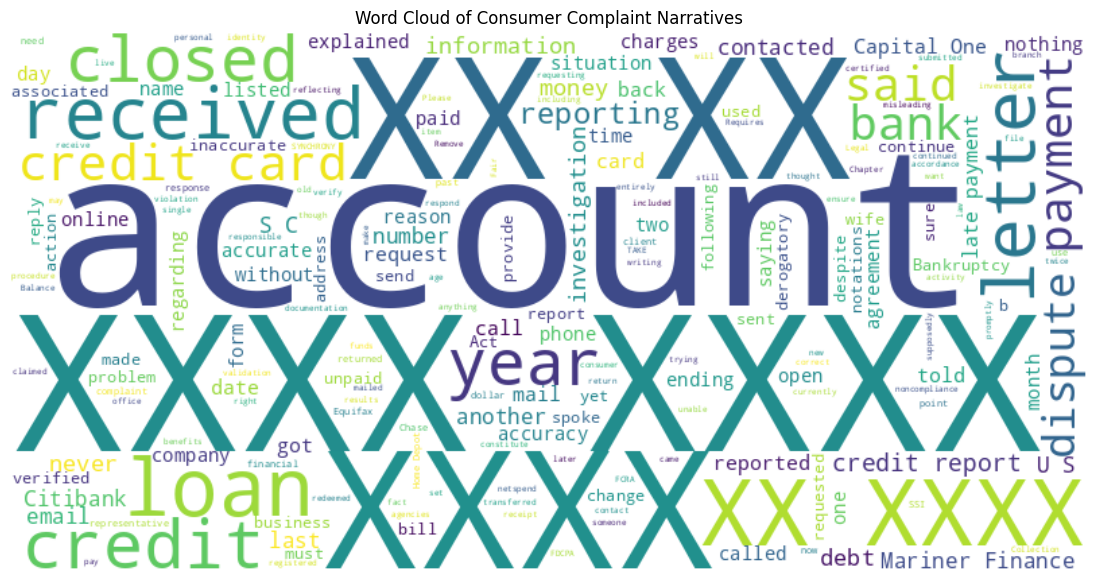

In [32]:
#Complaint narrative text analysis: Word cloud and sentiment

# Combine all narratives into one large text
narratives = df['Consumer complaint narrative'].dropna().str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(narratives)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Consumer Complaint Narratives')
plt.show()

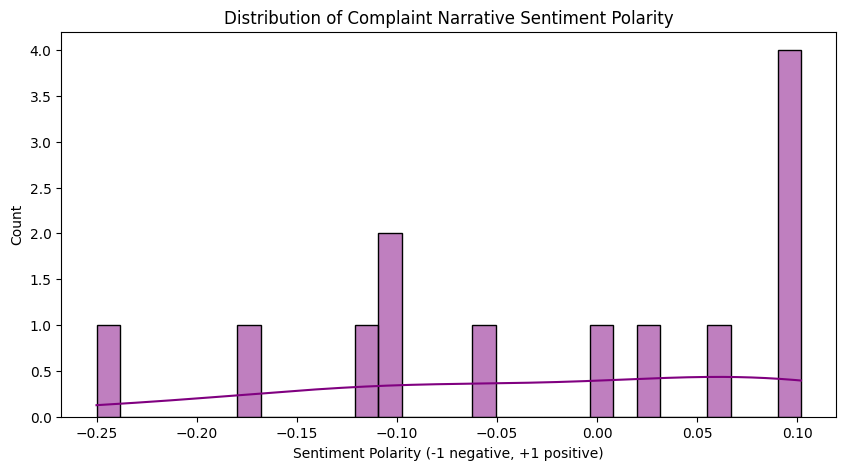

In [33]:
#Sentiment analysis (TextBlob)
def get_sentiment(text):
    if pd.isna(text) or text.strip() == '':
        return np.nan
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['Consumer complaint narrative'].apply(get_sentiment)

plt.figure(figsize=(10,5))
sns.histplot(df['sentiment'].dropna(), bins=30, kde=True, color='purple')
plt.title('Distribution of Complaint Narrative Sentiment Polarity')
plt.xlabel('Sentiment Polarity (-1 negative, +1 positive)')
plt.show()

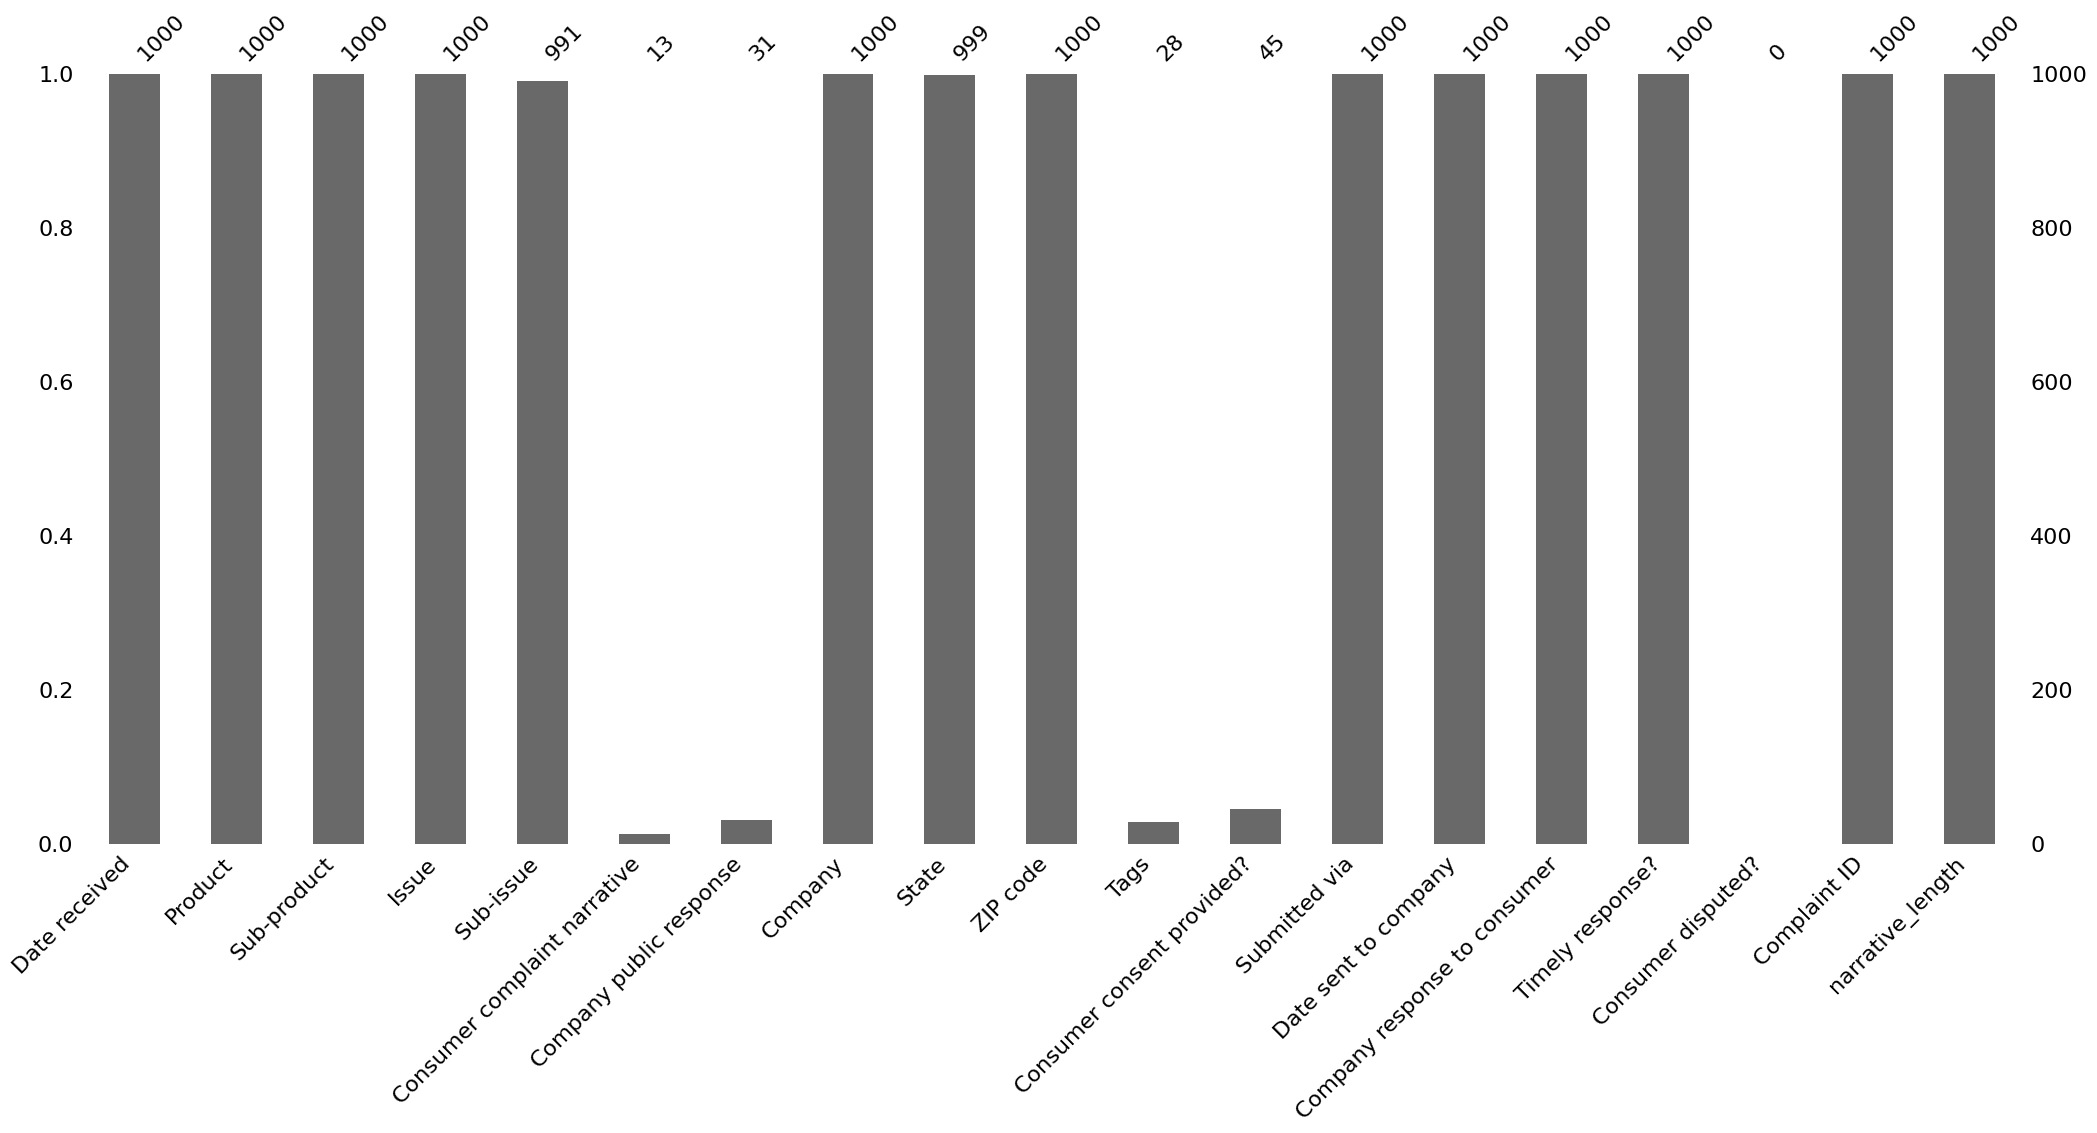

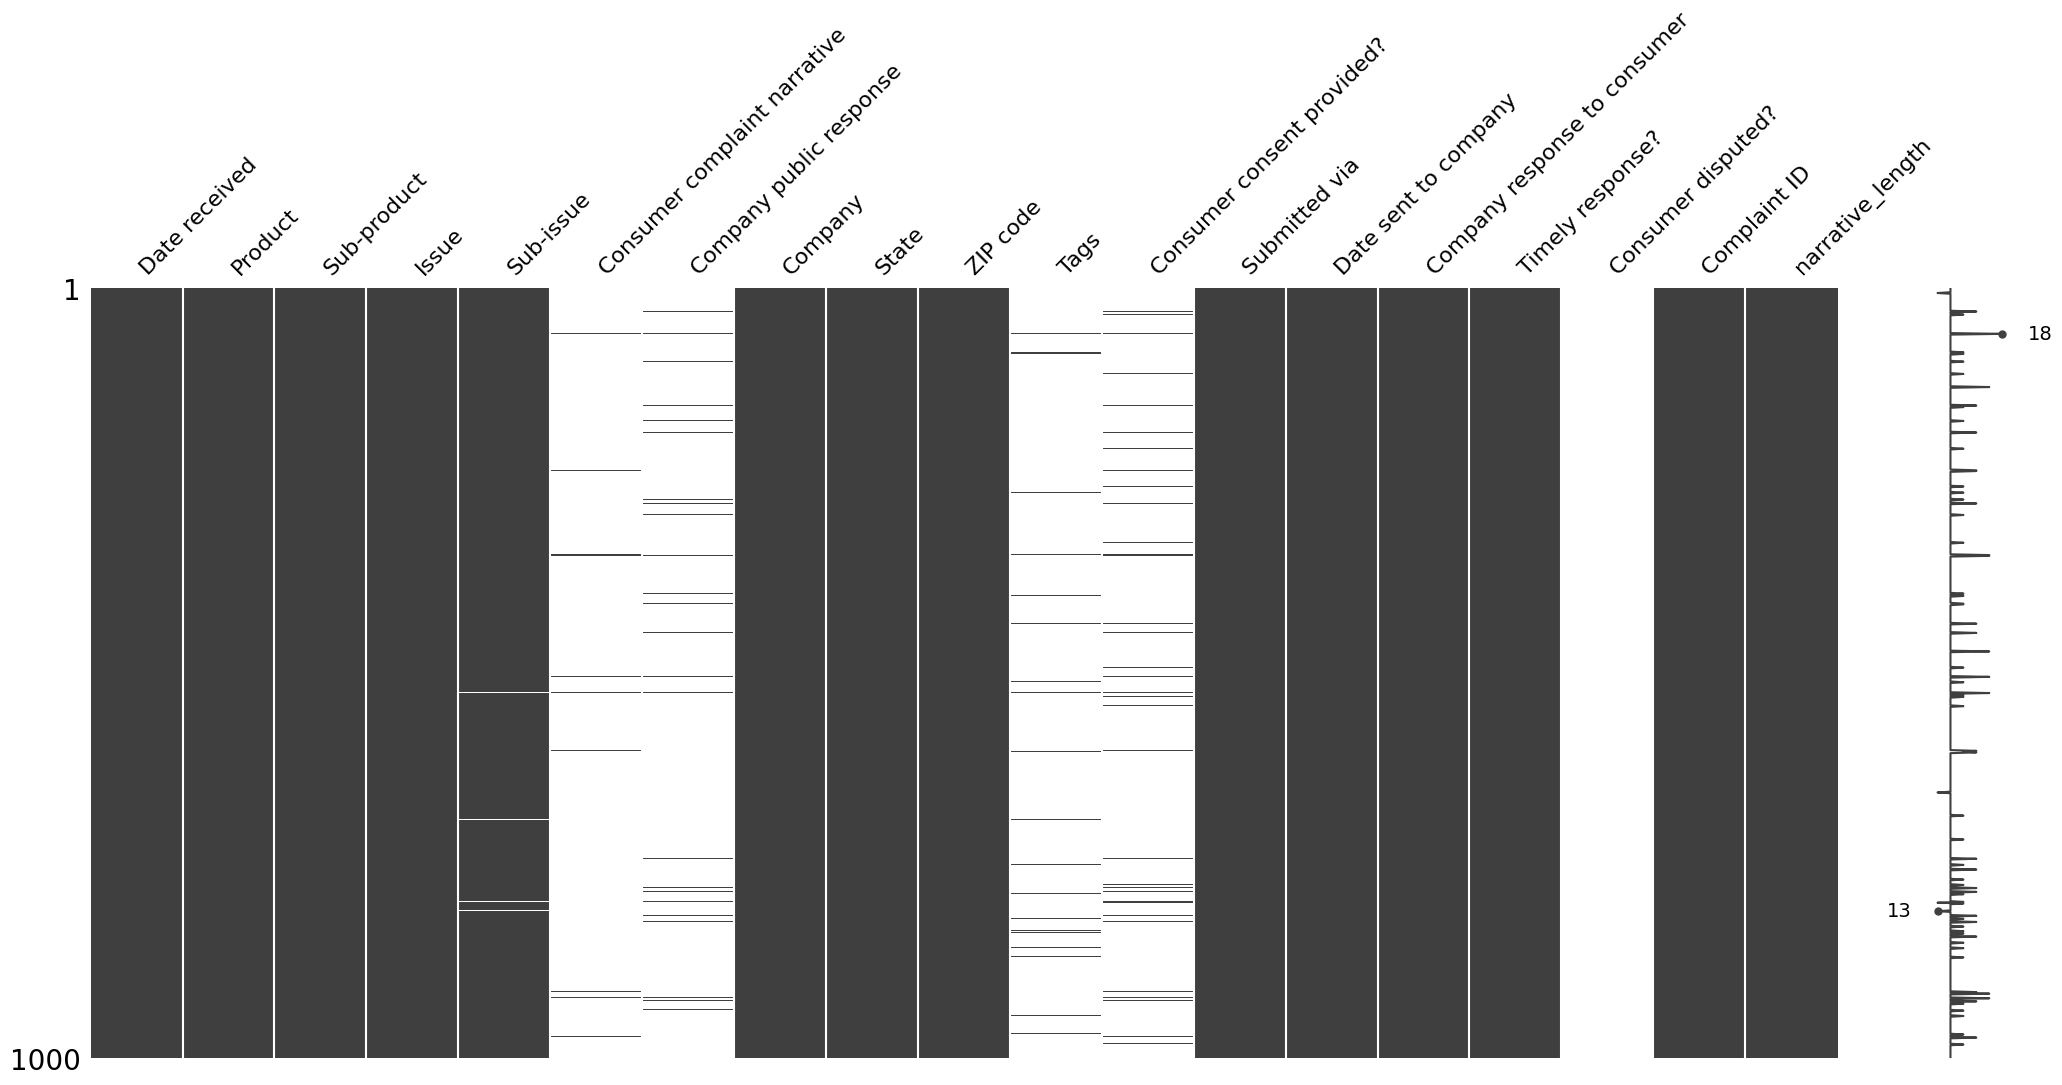

In [23]:
# Missing Values Visualization

import missingno as msno
msno.bar(df)
plt.show()

msno.matrix(df)
plt.show()


Percentage Distribution of Company Responses by Product:
 Company response to consumer                        Closed with explanation  \
Product                                                                       
Checking or savings account                                       66.666667   
Credit card                                                       45.454545   
Credit card or prepaid card                                      100.000000   
Credit reporting or other personal consumer rep...                 2.672606   
Credit reporting, credit repair services, or ot...                91.666667   
Debt collection                                                   56.603774   
Money transfer, virtual currency, or money service                42.857143   
Mortgage                                                          50.000000   
Payday loan, title loan, personal loan, or adva...               100.000000   
Prepaid card                                                       0.000

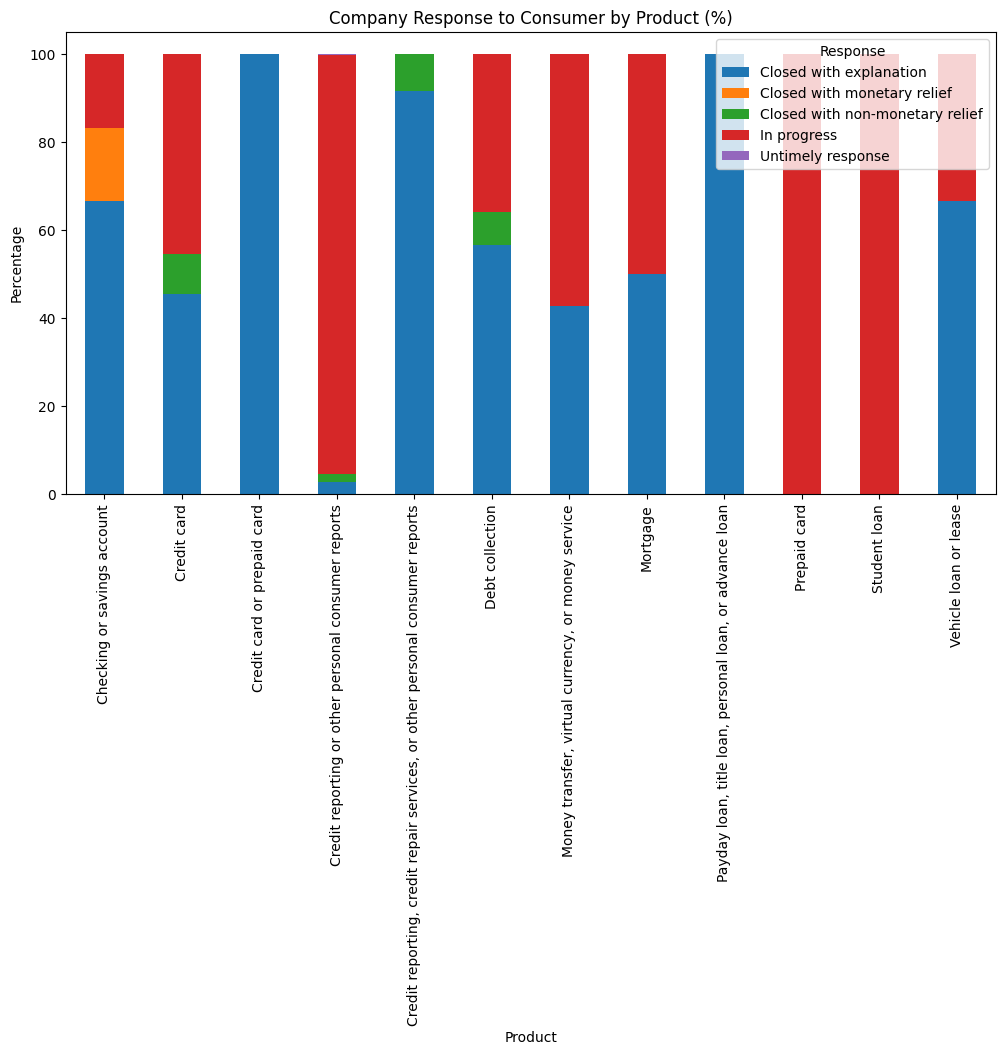

In [24]:
# Cross-tabulations & Relationships

# Complaints by Product and Company Response
if all(x in df.columns for x in ['Product', 'Company response to consumer']):
    cross_tab = pd.crosstab(df['Product'], df['Company response to consumer'], normalize='index') * 100
    print("\nPercentage Distribution of Company Responses by Product:\n", cross_tab)

    cross_tab.plot(kind='bar', stacked=True, figsize=(12,6))
    plt.title('Company Response to Consumer by Product (%)')
    plt.ylabel('Percentage')
    plt.legend(title='Response')
    plt.show()

Chi-square test for Product vs Company Response: chi2=622.11, p-value=0.0000


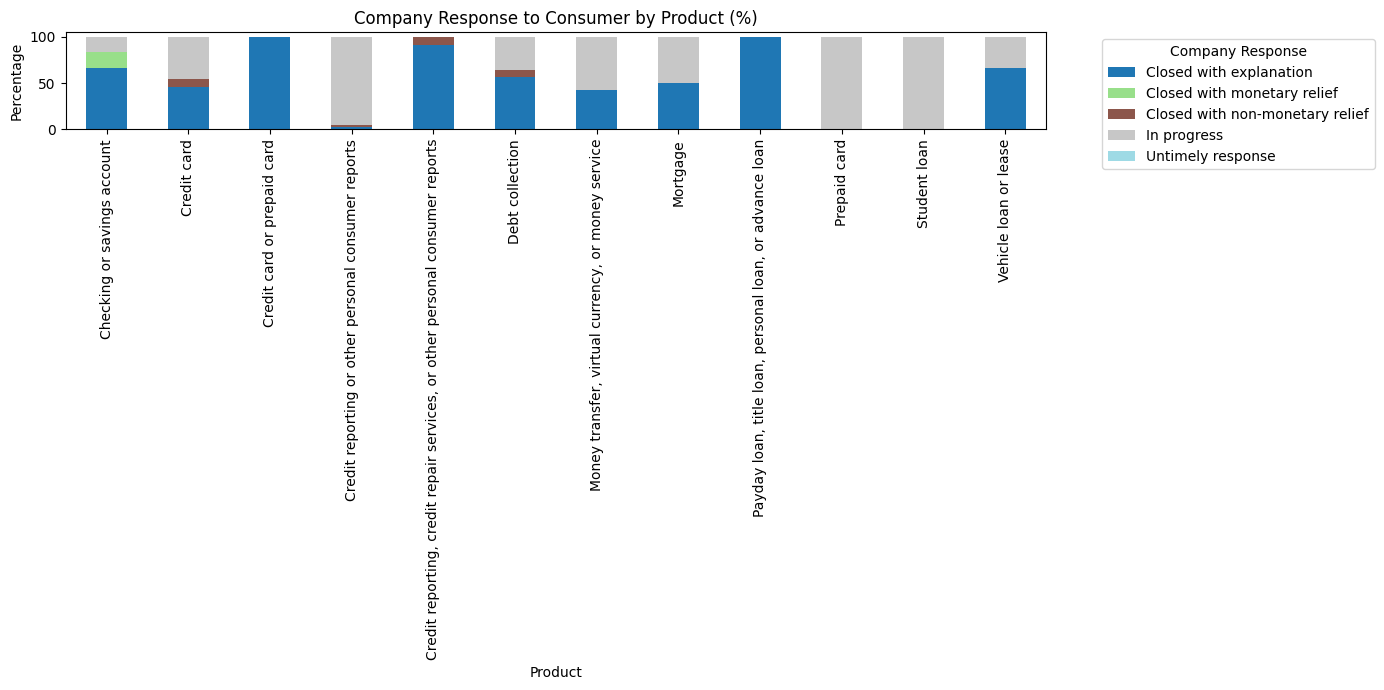

In [34]:
#Cross-tab with chi-square test: Product vs Company Response
if all(x in df.columns for x in ['Product', 'Company response to consumer']):
    cross_tab = pd.crosstab(df['Product'], df['Company response to consumer'])
    chi2, p, dof, ex = chi2_contingency(cross_tab)
    print(f"Chi-square test for Product vs Company Response: chi2={chi2:.2f}, p-value={p:.4f}")
    cross_tab_norm = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
    cross_tab_norm.plot(kind='bar', stacked=True, figsize=(14,7), colormap='tab20')
    plt.title('Company Response to Consumer by Product (%)')
    plt.ylabel('Percentage')
    plt.legend(title='Company Response', bbox_to_anchor=(1.05,1), loc='upper left')
    plt.tight_layout()
    plt.show()


Percentage of Timely Responses by Product:
 Timely response?                                          No         Yes
Product                                                                 
Checking or savings account                         0.000000  100.000000
Credit card                                         0.000000  100.000000
Credit card or prepaid card                         0.000000  100.000000
Credit reporting or other personal consumer rep...  0.222717   99.777283
Credit reporting, credit repair services, or ot...  0.000000  100.000000
Debt collection                                     0.000000  100.000000
Money transfer, virtual currency, or money service  0.000000  100.000000
Mortgage                                            0.000000  100.000000
Payday loan, title loan, personal loan, or adva...  0.000000  100.000000
Prepaid card                                        0.000000  100.000000
Student loan                                        0.000000  100.000000
Vehicl

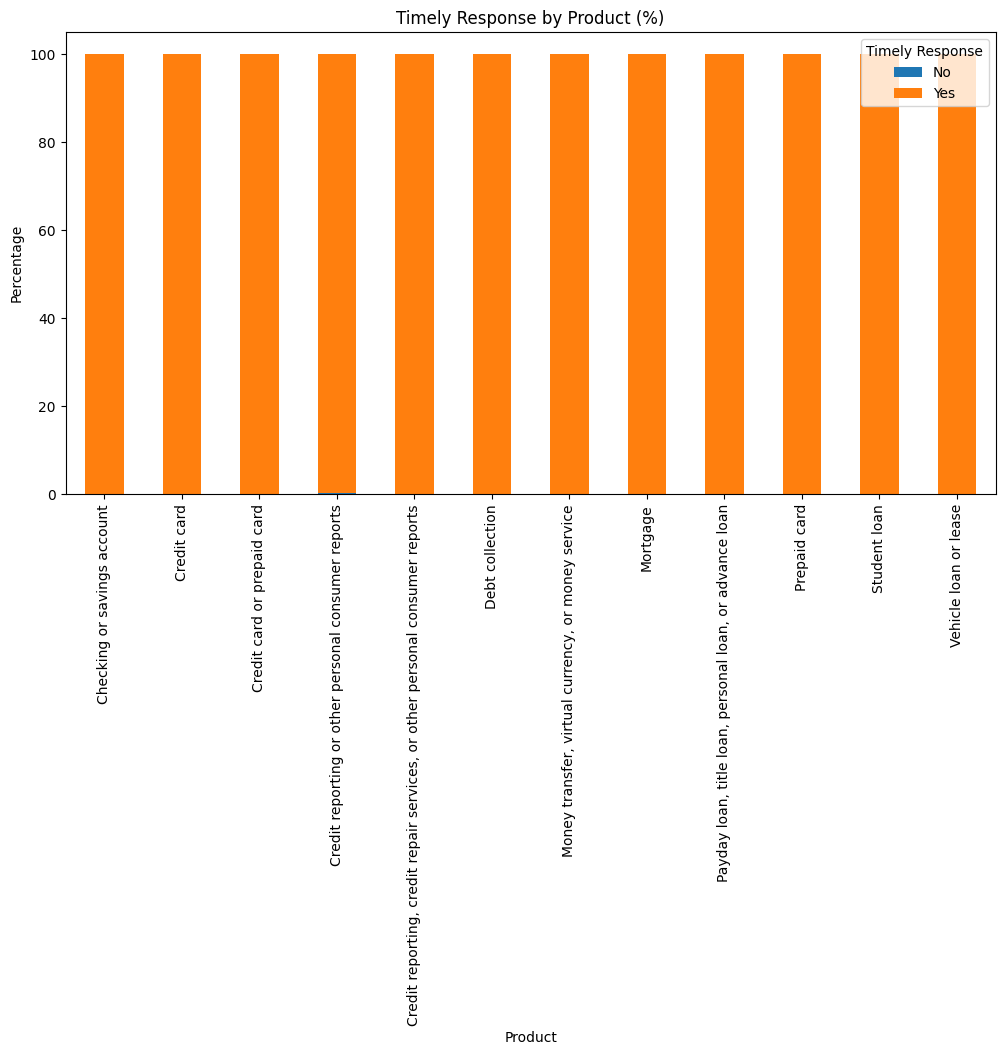

In [25]:
#Timely Response by Product
if all(x in df.columns for x in ['Product', 'Timely response?']):
    timely_tab = pd.crosstab(df['Product'], df['Timely response?'], normalize='index') * 100
    print("\nPercentage of Timely Responses by Product:\n", timely_tab)

    timely_tab.plot(kind='bar', stacked=True, figsize=(12,6))
    plt.title('Timely Response by Product (%)')
    plt.ylabel('Percentage')
    plt.legend(title='Timely Response')
    plt.show()

Consumer disputed?
NaN    1000
Name: count, dtype: int64


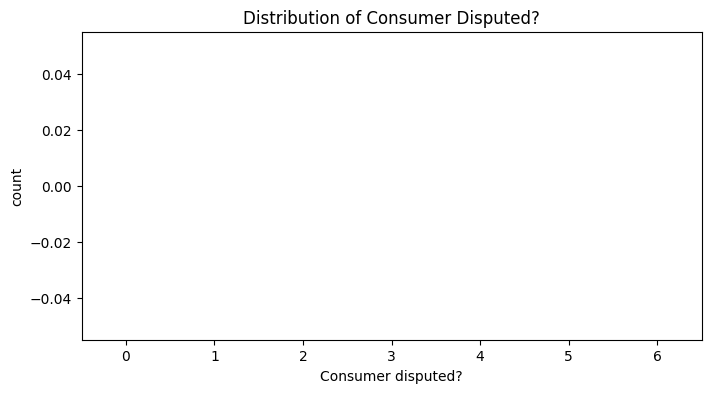

In [26]:
#Consumer Disputed? Analysis ---

if 'Consumer disputed?' in df.columns:
    print(df['Consumer disputed?'].value_counts(dropna=False))
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x='Consumer disputed?')
    plt.title('Distribution of Consumer Disputed?')
    plt.show()


In [35]:
#  Geospatial analysis by state (basic choropleth)
if 'State' in df.columns:
    state_counts = df['State'].value_counts().reset_index()
    state_counts.columns = ['state', 'count']

    # Load US states geometry data from plotly
    fig = px.choropleth(state_counts,
                        locations='state',
                        locationmode='USA-states',
                        color='count',
                        scope='usa',
                        color_continuous_scale="Viridis",
                        title='Number of Complaints by State')
    fig.show()

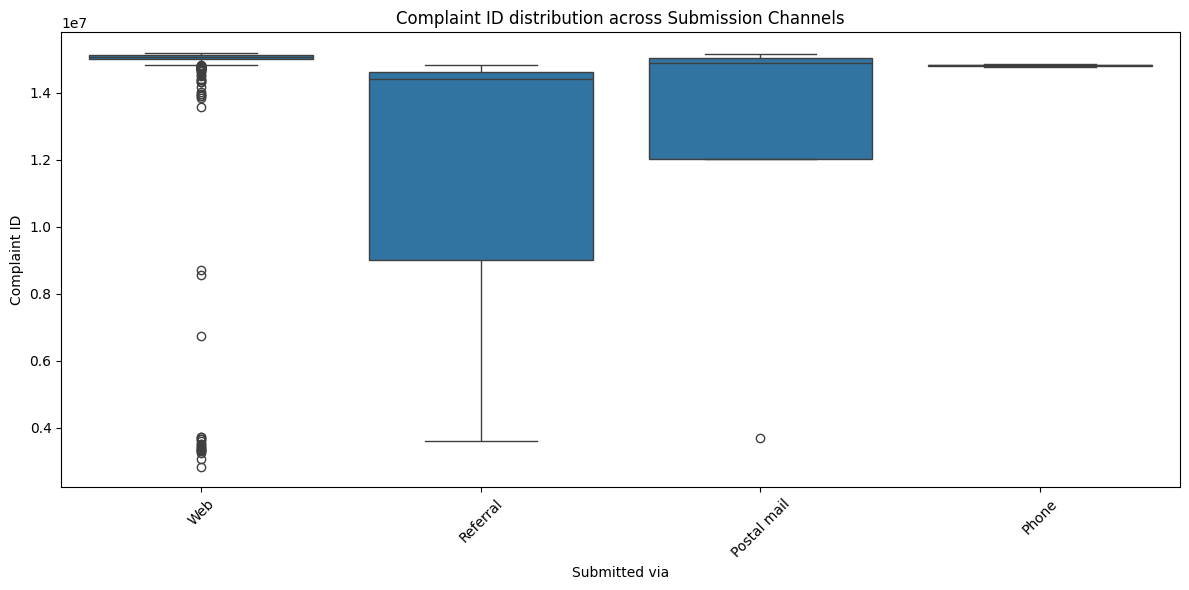

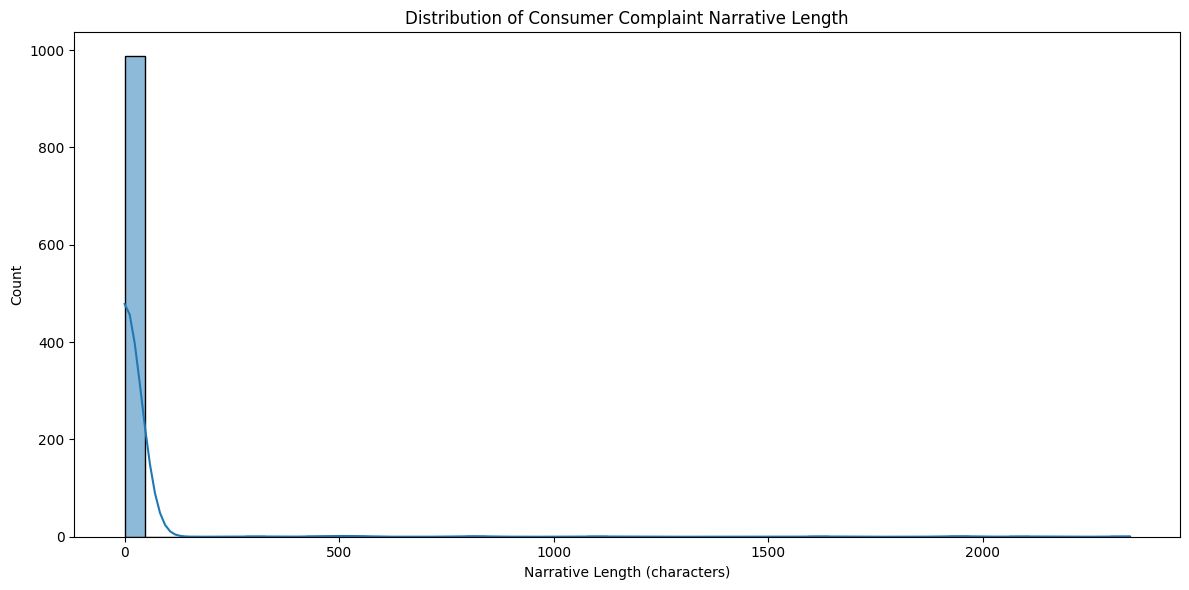

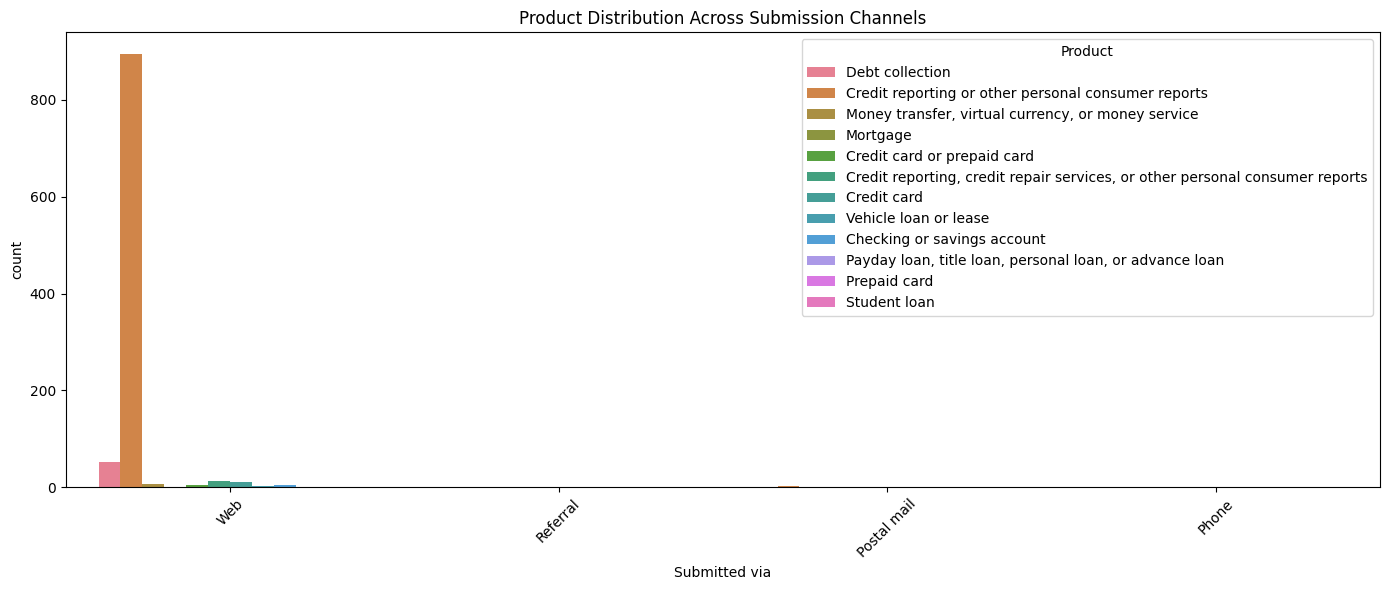

In [28]:


# Boxplot: Complaint ID by Submission Channel
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Submitted via', y='Complaint ID')
plt.title('Complaint ID distribution across Submission Channels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histogram + KDE: Narrative length
if 'narrative_length' in df.columns:
    plt.figure(figsize=(12,6))
    sns.histplot(df['narrative_length'], bins=50, kde=True)
    plt.title('Distribution of Consumer Complaint Narrative Length')
    plt.xlabel('Narrative Length (characters)')
    plt.tight_layout()
    plt.show()

# Countplot: Product vs Submission Channel
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='Submitted via', hue='Product')
plt.title('Product Distribution Across Submission Channels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


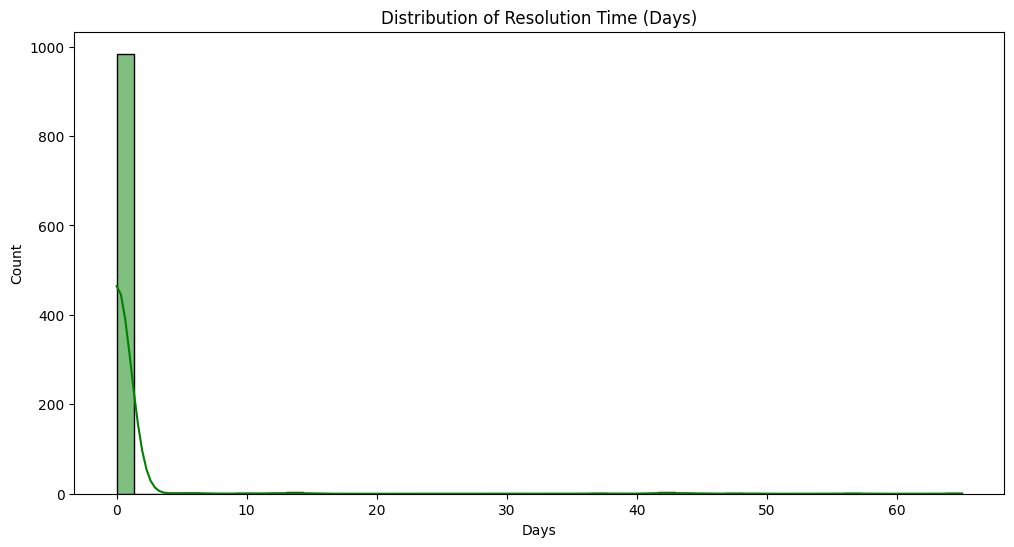

Average resolution time: 0.47 days
Median resolution time: 0.00 days


In [36]:
#Resolution time analysis (days between received and sent to company)
if all(x in df.columns for x in ['Date received', 'Date sent to company']):
    df['Date received'] = pd.to_datetime(df['Date received'], errors='coerce')
    df['Date sent to company'] = pd.to_datetime(df['Date sent to company'], errors='coerce')
    df['resolution_days'] = (df['Date sent to company'] - df['Date received']).dt.days

    plt.figure(figsize=(12,6))
    sns.histplot(df['resolution_days'].dropna(), bins=50, kde=True, color='green')
    plt.title('Distribution of Resolution Time (Days)')
    plt.xlabel('Days')
    plt.show()

    print(f"Average resolution time: {df['resolution_days'].mean():.2f} days")
    print(f"Median resolution time: {df['resolution_days'].median():.2f} days")

In [27]:
#Save cleaned and preprocessed sample ---
df.to_csv('cfpb_sample_eda_cleaned.csv', index=False)
print("Saved sample EDA cleaned dataset.")

Saved sample EDA cleaned dataset.
